In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('merged_citibike_2022.csv')

# Ensure date and time columns are correct
df['date'] = pd.to_datetime(df['date'])
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate trip duration for later analysis
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

/var/folders/gk/n7922c_x2k7f85761gxcw33w0000gn/T/ipykernel_1145/2380160687.py:6: DtypeWarning: Columns (0: start_station_id, 1: end_station_id) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged_citibike_2022.csv')


In [2]:
# Setting a theme (Choose one: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks')
sns.set_theme(style="whitegrid", palette="husl")

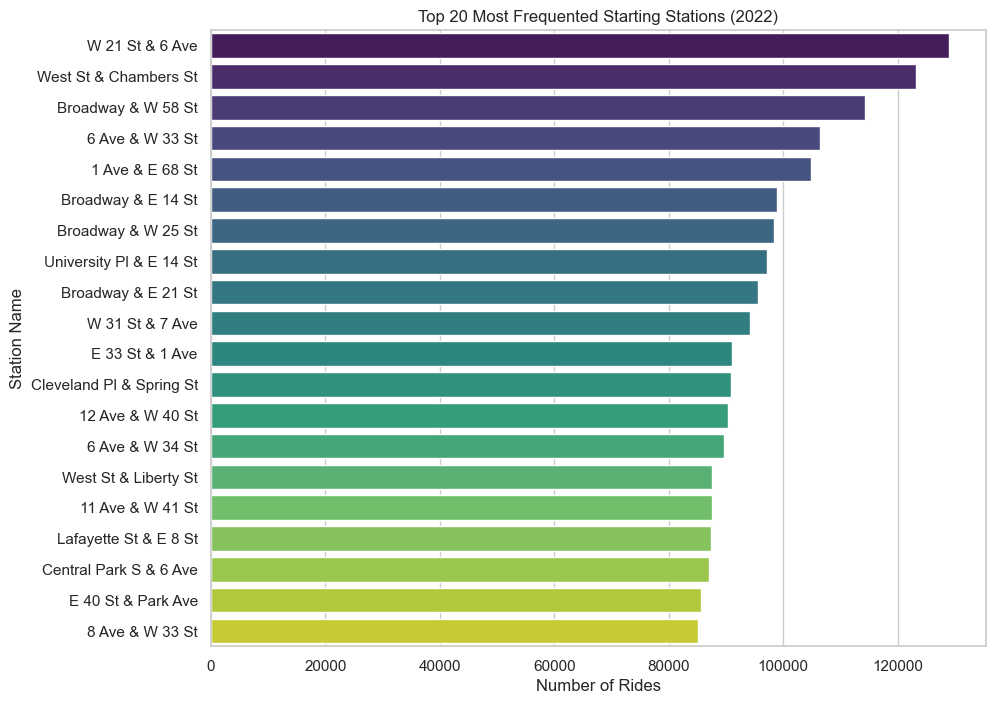

In [4]:
# Identify top 20 stations
top20_stations = df['start_station_name'].value_counts().nlargest(20).reset_index()
top20_stations.columns = ['station_name', 'ride_count']

# Create the plot
plt.figure(figsize=(10, 8))
# Fix: Assign 'station_name' to hue and set legend=False
sns.barplot(
    data=top20_stations, 
    x='ride_count', 
    y='station_name', 
    hue='station_name', 
    palette="viridis", 
    legend=False
)

plt.title('Top 20 Most Frequented Starting Stations (2022)')
plt.xlabel('Number of Rides')
plt.ylabel('Station Name')
plt.show()

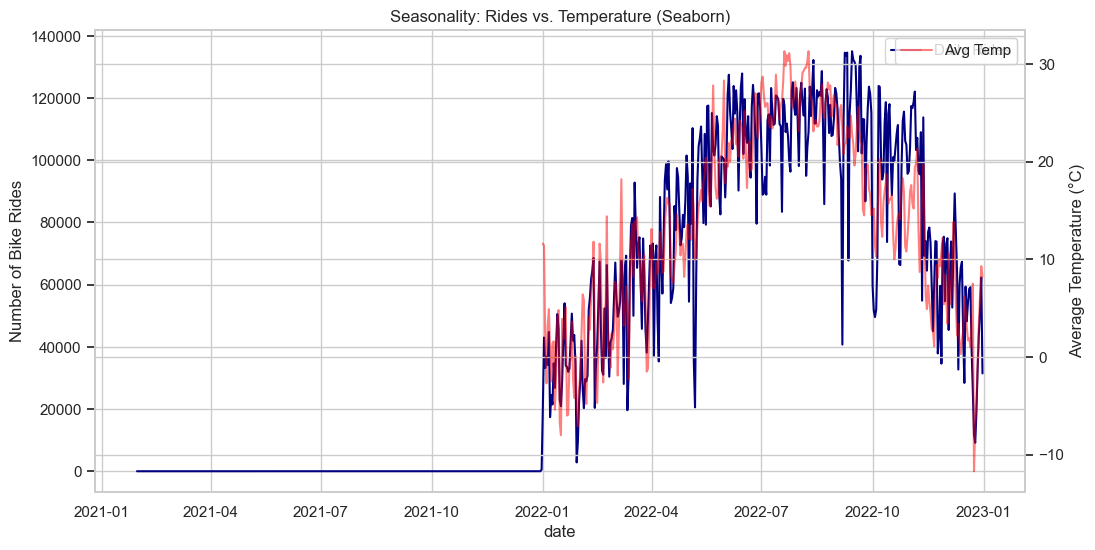

In [5]:
# Prepare daily counts (as done in previous exercise)
df_daily = df.groupby('date').agg({'ride_id': 'count', 'avgTemp': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bike Rides on Axis 1
sns.lineplot(data=df_daily, x='date', y='ride_id', ax=ax1, color='navy', label='Daily Rides')
ax1.set_ylabel('Number of Bike Rides')

# Temperature on Axis 2
ax2 = ax1.twinx()
sns.lineplot(data=df_daily, x='date', y='avgTemp', ax=ax2, color='red', alpha=0.5, label='Avg Temp')
ax2.set_ylabel('Average Temperature (°C)')

plt.title('Seasonality: Rides vs. Temperature (Seaborn)')
plt.show()

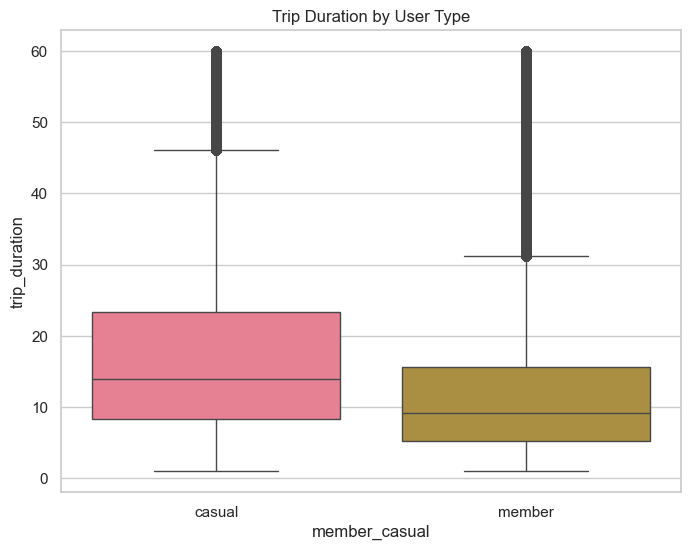

In [6]:
df_filtered = df[(df['trip_duration'] > 1) & (df['trip_duration'] < 60)]

plt.figure(figsize=(8, 6))
# Fix: Assign 'member_casual' to hue to match the x-axis colors
sns.boxplot(
    data=df_filtered, 
    x='member_casual', 
    y='trip_duration', 
    hue='member_casual', 
    legend=False
)

plt.title('Trip Duration by User Type')
plt.show()

This box plot compares trip durations between members and casual riders, focusing on trips under 60 minutes to maintain clarity. The median trip duration for casual riders is notably higher than that of members, suggesting that casual users may use the bikes more for leisure or tourism while members likely use them for shorter, time-sensitive commutes. The interquartile range (the box) is also wider for casual riders, indicating a greater variety in how long these users keep the bikes. Additionally, the whiskers and outliers show that even within the one-hour limit, casual riders more frequently reach the upper bounds of trip duration compared to the more consistent, shorter trips taken by annual members.

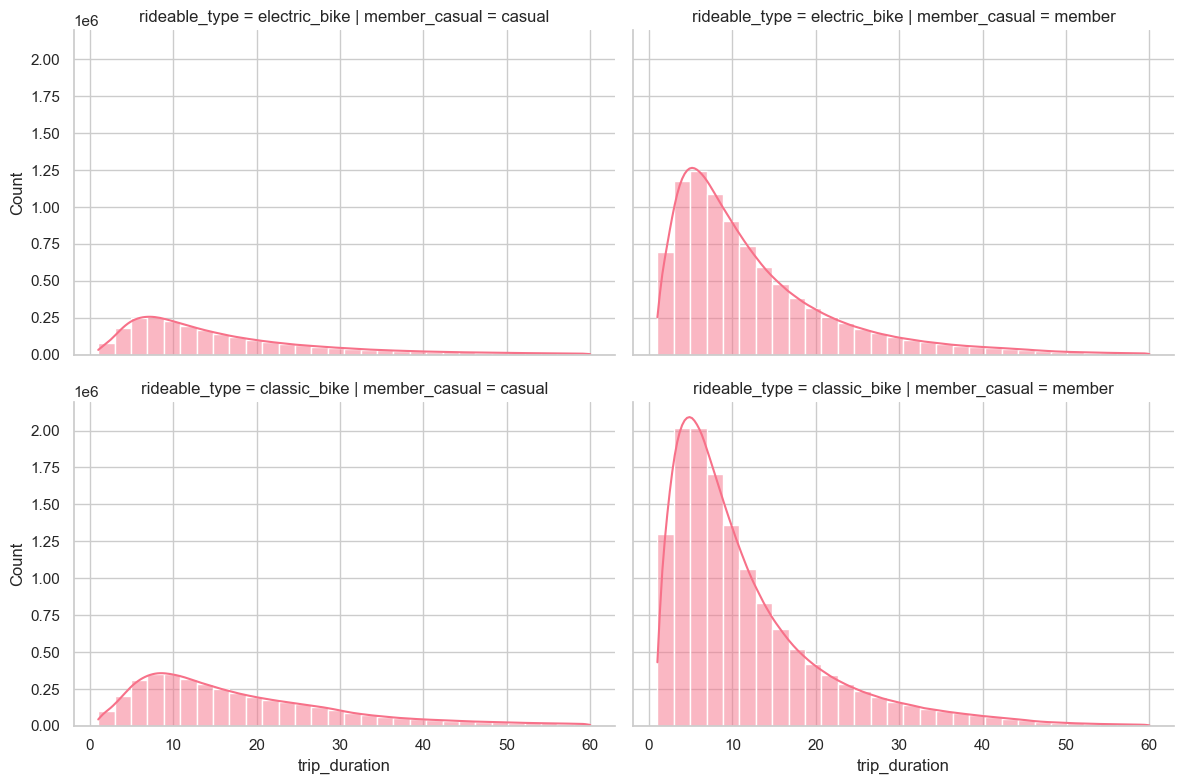

In [7]:
g = sns.FacetGrid(df_filtered, col="member_casual", row="rideable_type", height=4, aspect=1.5)
g.map(sns.histplot, "trip_duration", bins=30, kde=True)
plt.show()

The FacetGrid allows us to break down trip duration distributions by both user category and the specific type of bike used. By visualizing these side-by-side, we can see that while both groups prefer classic bikes for short durations, electric bikes show a slightly different distribution curve, potentially indicating longer distance travel. This grid structure makes it easy to spot that casual riders have a "flatter" distribution across all bike types compared to the sharp peaks seen in the member data, which reinforces the insight that member usage is highly predictable and centered around short-duration trips.